<a href="https://colab.research.google.com/github/Azeemahma/Reinforcement-Learning/blob/master/FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

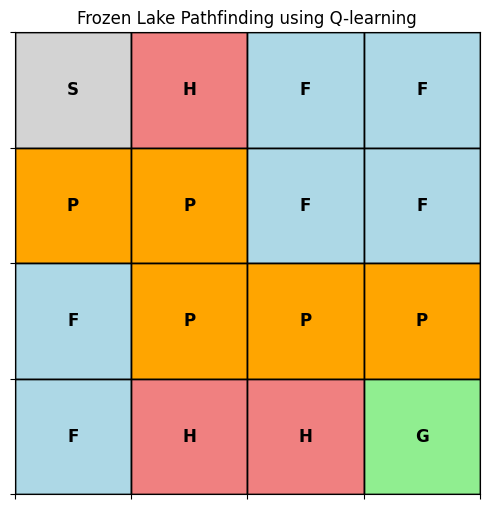

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Frozen Lake Grid dimensions and parameters
GRID_SIZE = 4  # 4x4 Grid
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Exploration rate
EPISODES = 500

# Initialize Q-table
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))  # 4 actions (up, down, left, right)

# Actions: [up, down, left, right]
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Rewards and obstacles
goal = (3, 3)  # Goal position
start = (0, 0)  # Start position

# Generate random holes avoiding start and goal
num_holes = 3
holes = set()
while len(holes) < num_holes:
    hole = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    if hole != start and hole != goal:
        holes.add(hole)
holes = list(holes)

reward_grid = np.full((GRID_SIZE, GRID_SIZE), -1)  # Default reward is -1
reward_grid[goal] = 100  # Goal reward
for hole in holes:
    reward_grid[hole] = -100  # Falling into hole penalty

def is_valid_state(x, y):
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and (x, y) not in holes

def choose_action(state):
    if random.uniform(0, 1) < EPSILON:  # Exploration
        return random.randint(0, 3)
    else:  # Exploitation
        x, y = state
        return np.argmax(q_table[x, y])

# Training
for episode in range(EPISODES):
    state = start
    while state != goal:
        x, y = state
        action = choose_action(state)
        dx, dy = actions[action]
        next_state = (x + dx, y + dy)

        if not is_valid_state(*next_state):
            next_state = state  # Stay in place if invalid move

        reward = reward_grid[next_state]
        next_x, next_y = next_state
        q_table[x, y, action] += ALPHA * (
            reward + GAMMA * np.max(q_table[next_x, next_y]) - q_table[x, y, action]
        )
        state = next_state

# Find shortest path
path = []
state = start
visited = set()
while state != goal:
    if state in visited:
        break
    visited.add(state)
    x, y = state
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    next_state = (x + dx, y + dy)
    if next_state == state or not is_valid_state(*next_state):
        break
    path.append(next_state)
    state = next_state

# Visualizing the grid
fig, ax = plt.subplots(figsize=(6, 6))  # Same figure size as in the second code
ax.set_xticks(range(GRID_SIZE + 1))
ax.set_yticks(range(GRID_SIZE + 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, which="major", color="black", linestyle="-", linewidth=1)
ax.invert_yaxis()

# Define colors for different states
colors = {
    "S": "lightgrey",  # Start
    "G": "lightgreen",  # Goal
    "H": "lightcoral",  # Hole
    "P": "orange",  # Path
    "F": "lightblue"
}

# Drawing the grid with colors and labels
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i, j) == start:
            label = "S"
        elif (i, j) == goal:
            label = "G"
        elif (i, j) in holes:
            label = "H"
        elif (i, j) in path:
            label = "P"
        else:
            label = "F"

        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=colors[label], ec="black"))
        ax.text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

plt.title("Frozen Lake Pathfinding using Q-learning")
plt.show()